In [12]:
import pandas as pd

### Problem 1 - Linear Regression with Direct Minimization

In [6]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pickle
from sklearn.datasets import make_classification

## Part 1 - Linear Regression

In [230]:
Xtrain,ytrain,Xtest,ytest = pickle.load(open('diabetes.pickle','rb'),encoding='latin1')
df1 = pd.read_pickle("diabetes.pickle")
df = pd.DataFrame(
    ytrain
)

df

,0
0,151
1,75
2,141
3,206
4,135
5,97
6,138
7,63
8,110
9,310


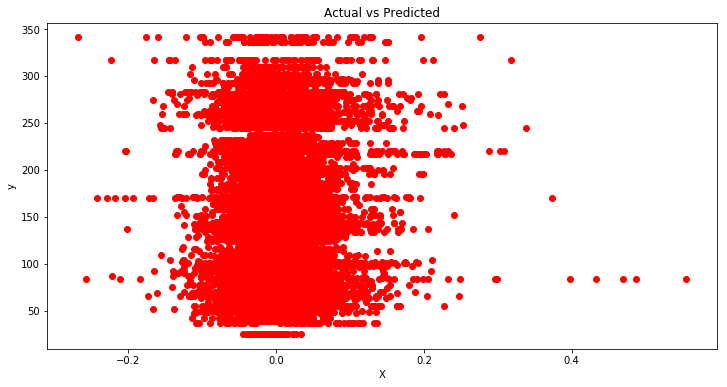

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(Xtrain, ytrain, 'ro')   # scatter plot showing actual data
plt.title('Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('y')

plt.show()

In [237]:
def learnOLERegression(X,y):
    # Inputs:                                                         
    # X = N x d 
    # y = N x 1                                                               
    # Output: 
    # w = d x 1 

    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    
    
    N = X.shape[0]
    d = X.shape[1]
    w = np.zeros((d,1))
    ymean = 0
    xmean = np.zeros((d,1))
    
    for i in range(N):
#         add all the y's
        ymean += y[i]
        for j in range(d):
#             add all the x's in each column
            xmean[j] += X[i][j]
#     average the y's
    ymean = ymean / N
#     average each column of x's
    for i in range(d):
        xmean[i] = xmean[i] / N
        
    a = np.zeros((d, 1))
    w = np.zeros((d, 1))
    num = 0
    den = 1
    for i in range(d):
        for j in range(N):
            num += (X[j][i] - xmean[i]) * (y[j] - ymean)
            den += (X[j][i] - xmean[i])**2        
        w[i] = num / den
        a[i] = ymean - (w[i] * xmean[i])
    
    est = np.zeros((d, 1))
    for i in range(d):
        for j in range(N):
            est[i] = a[i] + (w[i] * X[j, i])
    return w

In [238]:

print('PROBLEM 1')
print('----------')

PROBLEM 1
----------


In [248]:
def testOLERegression(w,X,y):
    # Inputs:
    # w = d x 1
    # Xtest = N x d
    # ytest = N x 1
    # Output:
    # rmse = scalar value
    N = X.shape[0]
    d = X.shape[1]
    ymean = 0
    xmean = np.zeros((d,1))
    a = np.zeros((d, 1))
    for i in range(N):
#         add all the y's
        ymean += y[i]
        for j in range(d):
#             add all the x's in each column
            xmean[j] += X[i][j]
#     average the y's
    ymean = ymean / N
#     average each column of x's
    for i in range(d):
        xmean[i] = xmean[i] / N
        a[i] = ymean - (w[i] * xmean[i])
    
    est = np.zeros((d, 1))
    y2 = 0
    for i in range(d):
        for j in range(N):
            est[i] = a[i] + (w[i] * X[j, i])
        y2 += (est[i] - y[i])**2
    y2 = y2 / d
    

    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    rmse = np.sqrt(y2)
    return rmse

def getLine(w,X,y):
    # Inputs:
    # w = d x 1
    # Xtest = N x d
    # ytest = N x 1
    # Output:
    # rmse = scalar value
    N = X.shape[0]
    d = X.shape[1]
    ymean = 0
    xmean = np.zeros((d,1))
    a = np.zeros((d, 1))
    for i in range(N):
#         add all the y's
        ymean += y[i]
        for j in range(d):
#             add all the x's in each column
            xmean[j] += X[i][j]
#     average the y's
    ymean = ymean / N
#     average each column of x's
    for i in range(d):
        xmean[i] = xmean[i] / N
        a[i] = ymean - (w[i] * xmean[i])
    
    est = np.zeros((d, 1))
    y2 = 0
    for i in range(d):
        for j in range(N):
            est[i] = a[i] + (w[i] * X[j, i])
        y2 += (est[i] - y[i])**2
    y2 = y2 / d
    

    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    rmse = np.sqrt(y2)
    return est

RMSE without intercept on train data - 71.24
RMSE with intercept on train data - 72.29
RMSE without intercept on test data - 88.91
RMSE with intercept on test data - 87.11


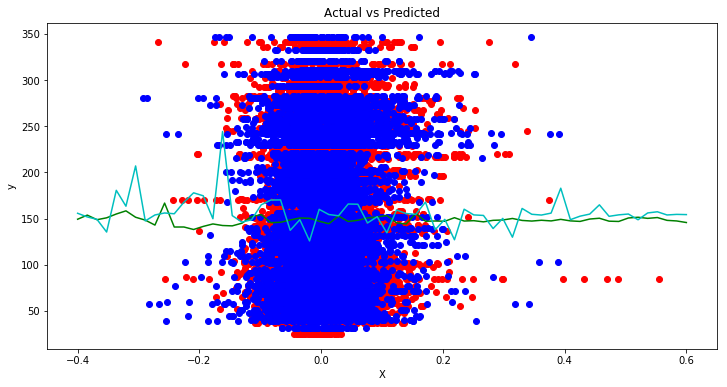

In [253]:
Xtrain,ytrain,Xtest,ytest = pickle.load(open('diabetes.pickle','rb'),encoding='latin1')   
# add intercept
x1 = np.ones((len(Xtrain),1))
x2 = np.ones((len(Xtest),1))

Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

w = learnOLERegression(Xtrain,ytrain)
w_i = learnOLERegression(Xtrain_i,ytrain)

rmse = testOLERegression(w,Xtrain,ytrain)
rmse_i = testOLERegression(w_i,Xtrain_i,ytrain)
print('RMSE without intercept on train data - %.2f'%rmse)
print('RMSE with intercept on train data - %.2f'%rmse_i)

rmse = testOLERegression(w,Xtest,ytest)
rmse_i = testOLERegression(w_i,Xtest_i,ytest)
es = getLine(w_i, Xtrain, ytrain)
est = getLine(w_i, Xtest, ytest)

xval = np.linspace(-0.4, 0.6, 64)

print('RMSE without intercept on test data - %.2f'%rmse)
print('RMSE with intercept on test data - %.2f'%rmse_i)

plt.figure(figsize=(12, 6))
plt.plot(Xtrain, ytrain, 'ro')# scatter plot showing actual data
plt.plot(Xtest, ytest, 'bo')
plt.plot(xval, es, 'g')
plt.plot(xval, est, 'c')

plt.title('Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('y')

plt.show()


### Problem 2 - Linear Regression with Gradient Descent

In [81]:
print('PROBLEM 2')
print('----------')

PROBLEM 2
----------


In [ ]:
def regressionObjVal(w, X, y):

    # compute squared error (scalar) with respect
    # to w (vector) for the given data X and y      
    #
    # Inputs:
    # w = d x 1
    # X = N x d
    # y = N x 1
    # Output:
    # error = scalar value

    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    error = 0
    return error


In [ ]:
def regressionGradient(w, X, y):

    # compute gradient of squared error (scalar) with respect
    # to w (vector) for the given data X and y   
    
    # Inputs:
    # w = d x 1
    # X = N x d
    # y = N x 1
    # Output:
    # gradient = d length vector (not a d x 1 matrix)

    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE 

    error_grad = np.zeros((X.shape[1],))
    return error_grad

In [ ]:
Xtrain,ytrain,Xtest,ytest = pickle.load(open('diabetes.pickle','rb'),encoding='latin1')   
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)
args = (Xtrain_i,ytrain)
opts = {'maxiter' : 50}    # Preferred value.    
w_init = np.zeros((Xtrain_i.shape[1],1))
soln = minimize(regressionObjVal, w_init, jac=regressionGradient, args=args,method='CG', options=opts)
w = np.transpose(np.array(soln.x))
w = w[:,np.newaxis]
rmse = testOLERegression(w,Xtrain_i,ytrain)
print('Gradient Descent Linear Regression RMSE on train data - %.2f'%rmse)
rmse = testOLERegression(w,Xtest_i,ytest)
print('Gradient Descent Linear Regression RMSE on test data - %.2f'%rmse)

## Part 2 - Linear Classification

### Problem 3 - Perceptron using Gradient Descent

In [ ]:
print('PROBLEM 3')
print('----------')

In [ ]:
def predictLinearModel(w,Xtest):
    # Inputs:
    # w = d x 1
    # Xtest = N x d
    # Output:
    # ypred = N x 1 vector of predictions

    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    ypred = np.zeros([Xtest.shape[0],1])
    return ypred

In [ ]:
def evaluateLinearModel(w,Xtest,ytest):
    # Inputs:
    # w = d x 1
    # Xtest = N x d
    # ytest = N x 1
    # Output:
    # acc = scalar values

    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    acc = 0
    return acc

In [ ]:
Xtrain,ytrain, Xtest, ytest = np.load(open('sample.pickle','rb')) 
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

args = (Xtrain_i,ytrain)
opts = {'maxiter' : 50}    # Preferred value.    
w_init = np.zeros((Xtrain_i.shape[1],1))
soln = minimize(regressionObjVal, w_init, jac=regressionGradient, args=args,method='CG', options=opts)
w = np.transpose(np.array(soln.x))
w = w[:,np.newaxis]
acc = evaluateLinearModel(w,Xtrain_i,ytrain)
print('Perceptron Accuracy on train data - %.2f'%acc)
acc = evaluateLinearModel(w,Xtest_i,ytest)
print('Perceptron Accuracy on test data - %.2f'%acc)

### Problem 4 - Logistic Regression Using Newton's Method

In [ ]:
print('PROBLEM 4')
print('----------')

In [ ]:
def logisticObjVal(w, X, y):

    # compute log-loss error (scalar) with respect
    # to w (vector) for the given data X and y                               
    # Inputs:
    # w = d x 1
    # X = N x d
    # y = N x 1
    # Output:
    # error = scalar
    
    
    if len(w.shape) == 1:
        w = w[:,np.newaxis]
    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    error = 0
    return error


In [ ]:
def logisticGradient(w, X, y):

    # compute the gradient of the log-loss error (vector) with respect
    # to w (vector) for the given data X and y  
    #
    # Inputs:
    # w = d x 1
    # X = N x d
    # y = N x 1
    # Output:
    # error = d length gradient vector (not a d x 1 matrix)

    if len(w.shape) == 1:
        w = w[:,np.newaxis]
    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    gradient = np.zeros((w.shape[0],))
    return gradient

In [ ]:
def logisticHessian(w, X, y):

    # compute the Hessian of the log-loss error (matrix) with respect
    # to w (vector) for the given data X and y                               
    #
    # Inputs:
    # w = d x 1
    # X = N x d
    # y = N x 1
    # Output:
    # Hessian = d x d matrix
    
    if len(w.shape) == 1:
        w = w[:,np.newaxis]
    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    hessian = np.eye(X.shape[1])
    return hessian

In [ ]:
Xtrain,ytrain, Xtest, ytest = np.load(open('sample.pickle','rb')) 
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

args = (Xtrain_i,ytrain)
opts = {'maxiter' : 50}    # Preferred value.    
w_init = np.zeros((Xtrain_i.shape[1],1))
soln = minimize(logisticObjVal, w_init, jac=logisticGradient, hess=logisticHessian, args=args,method='Newton-CG', options=opts)
w = np.transpose(np.array(soln.x))
w = np.reshape(w,[len(w),1])
acc = evaluateLinearModel(w,Xtrain_i,ytrain)
print('Logistic Regression Accuracy on train data - %.2f'%acc)
acc = evaluateLinearModel(w,Xtest_i,ytest)
print('Logistic Regression Accuracy on test data - %.2f'%acc)

### Problem 5 - Support Vector Machines Using Gradient Descent

In [ ]:
print('PROBLEM 5')
print('----------')

In [ ]:
def trainSGDSVM(X,y,T,eta=0.01):
    # learn a linear SVM by implementing the SGD algorithm
    #
    # Inputs:
    # X = N x d
    # y = N x 1
    # T = number of iterations
    # eta = learning rate
    # Output:
    # weight vector, w = d x 1
    
    # IMPLEMENT THIS METHOD
    w = np.zeros([X.shape[1],1])
    return w

In [ ]:
Xtrain,ytrain, Xtest, ytest = np.load(open('sample.pickle','rb')) 
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

args = (Xtrain_i,ytrain)
w = trainSGDSVM(Xtrain_i,ytrain,100,0.01)
acc = evaluateLinearModel(w,Xtrain_i,ytrain)
print('SVM Accuracy on train data - %.2f'%acc)
acc = evaluateLinearModel(w,Xtest_i,ytest)
print('SVM Accuracy on test data - %.2f'%acc)

### Problem 6 - Plotting decision boundaries

In [ ]:
print('Problem 6')
print('---------')

In [ ]:
def plotBoundaries(w,X,y):
    # plotting boundaries

    mn = np.min(X,axis=0)
    mx = np.max(X,axis=0)
    x1 = np.linspace(mn[1],mx[1],100)
    x2 = np.linspace(mn[2],mx[2],100)
    xx1,xx2 = np.meshgrid(x1,x2)
    xx = np.zeros((x1.shape[0]*x2.shape[0],2))
    xx[:,0] = xx1.ravel()
    xx[:,1] = xx2.ravel()
    xx_i = np.concatenate((np.ones((xx.shape[0],1)), xx), axis=1)
    ypred = predictLinearModel(w,xx_i)
    ax.contourf(x1,x2,ypred.reshape((x1.shape[0],x2.shape[0])),alpha=0.3,cmap='cool')
    ax.scatter(X[:,1],X[:,2],c=y.flatten())

In [ ]:
Xtrain,ytrain, Xtest, ytest = np.load(open('sample.pickle','rb')) 
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

# Replace next three lines with code for learning w using the three methods
w_perceptron = np.zeros((Xtrain_i.shape[1],1))
w_logistic = np.zeros((Xtrain_i.shape[1],1))
w_svm = np.zeros((Xtrain_i.shape[1],1))
fig = plt.figure(figsize=(20,6))

ax = plt.subplot(1,3,1)
plotBoundaries(w_perceptron,Xtrain_i,ytrain)
ax.set_title('Perceptron')

ax = plt.subplot(1,3,2)
plotBoundaries(w_logistic,Xtrain_i,ytrain)
ax.set_title('Logistic Regression')

ax = plt.subplot(1,3,3)
plotBoundaries(w_svm,Xtrain_i,ytrain)
ax.set_title('SVM')
